<a href="https://colab.research.google.com/github/meteixeira30-lab/healthcare-no-show-analysis/blob/main/Projeto_Healthcare_Faltas_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análise de No-Show em Consultas Médicas**

Objetivo: Analisar os fatores que levam pacientes a faltarem em consultas agendadas e propor soluções para reduzir a taxa de absenteísmo.

Ferramentas: Python, Pandas, Seaborn e Faker para geração de dados sintéticos.


In [1]:
# Instalando o gerador de dados fake que vimos no e-mail
!pip install faker -q

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from faker import Faker
import random

fake = Faker('pt_BR') # Gerando dados com nomes brasileiros

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.2 MB/s eta 0:00:00


In [2]:
dados = []
for _ in range(500):
    dias_antecedencia = random.randint(1, 30)
    recebeu_sms = random.choice([0, 1])

    # Criando uma lógica: se marcou com muita antecedência e NÃO recebeu SMS, chance de faltar aumenta
    if dias_antecedencia > 15 and recebeu_sms == 0:
        faltou = random.choices([0, 1], weights=[30, 70])[0]
    else:
        faltou = random.choices([0, 1], weights=[85, 15])[0]

    dados.append({
        "Paciente": fake.name(),
        "Idade": random.randint(0, 85),
        "Especialidade": random.choice(["Cardiologia", "Pediatria", "Clínico Geral", "Ortopedia"]),
        "Dias_Antecedencia": dias_antecedencia,
        "Recebeu_SMS": recebeu_sms,
        "Faltou": faltou
    })

df = pd.DataFrame(dados)
df.head() # Visualiza as primeiras 5 linhas

,Paciente,Idade,Especialidade,Dias_Antecedencia,Recebeu_SMS,Faltou
0,Ana Beatriz Fogaça,85,Cardiologia,24,1,0
1,Luna Alves,58,Pediatria,24,0,0
2,Srta. Maria Liz Souza,47,Cardiologia,20,1,0
3,Renan Guerra,33,Pediatria,20,0,1
4,Sra. Evelyn Sá,44,Ortopedia,15,0,0


Nesta etapa, estou simulando dados de um hospital para entender por que os pacientes faltam às consultas.

In [3]:
dados = []
for _ in range(500):
    dias_antecedencia = random.randint(1, 30)
    recebeu_sms = random.choice([0, 1])

    # Criando uma lógica: se marcou com muita antecedência e NÃO recebeu SMS, chance de faltar aumenta
    if dias_antecedencia > 15 and recebeu_sms == 0:
        faltou = random.choices([0, 1], weights=[30, 70])[0]
    else:
        faltou = random.choices([0, 1], weights=[85, 15])[0]

    dados.append({
        "Paciente": fake.name(),
        "Idade": random.randint(0, 85),
        "Especialidade": random.choice(["Cardiologia", "Pediatria", "Clínico Geral", "Ortopedia"]),
        "Dias_Antecedencia": dias_antecedencia,
        "Recebeu_SMS": recebeu_sms,
        "Faltou": faltou
    })

df = pd.DataFrame(dados)
df.head() # Visualiza as primeiras 5 linhas

,Paciente,Idade,Especialidade,Dias_Antecedencia,Recebeu_SMS,Faltou
0,Levi Farias,36,Cardiologia,23,0,0
1,Letícia Guerra,1,Pediatria,3,1,0
2,Srta. Sophie Siqueira,56,Clínico Geral,24,0,1
3,Pedro Lucas Aparecida,19,Cardiologia,1,0,1
4,Alexandre Vargas,35,Cardiologia,9,1,1


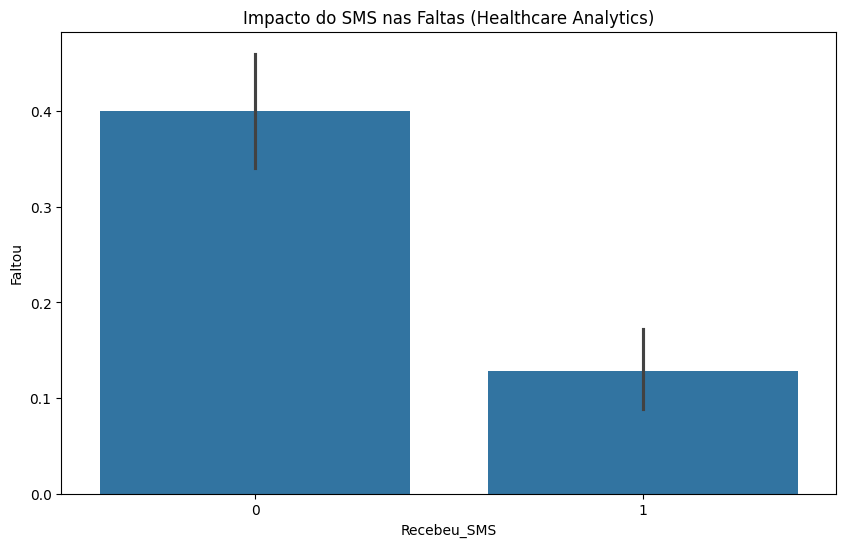

In [4]:
plt.figure(figsize=(10,6))
sns.barplot(x='Recebeu_SMS', y='Faltou', data=df)
plt.title('Impacto do SMS nas Faltas (Healthcare Analytics)')
plt.show()

In [5]:
# Calculando a taxa de falta geral
taxa_falta = (df['Faltou'].mean() * 100)
print(f"Taxa de falta geral no hospital: {taxa_falta:.2f}%")

# Comparando: Quem recebeu SMS falta menos?
analise_sms = df.groupby('Recebeu_SMS')['Faltou'].mean() * 100
print("\nTaxa de falta por recebimento de SMS:")
print(analise_sms)

Taxa de falta geral no hospital: 26.40%

Taxa de falta por recebimento de SMS:
Recebeu_SMS
0    40.0
1    12.8
Name: Faltou, dtype: float64



**Principais Descobertas:**

Gargalo Identificado: A taxa de falta geral de 26.4% está muito acima da média ideal de mercado (que costuma girar em torno de 15-20%).

Eficiência do Lembrete: O uso de SMS mostrou-se um divisor de águas. Pacientes sem lembrete faltam quase 4 vezes mais do que aqueles que recebem a notificação.

Plano de Ação Recomendado:

Automação Total: Implementar o envio de SMS/WhatsApp para 100% da base de pacientes.

Foco em Antecedência: Priorizar o contato com pacientes que agendaram com mais de 15 dias de antecedência, onde o risco de esquecimento é maior.

Análise de Custo-Benefício: O custo de um SMS é de centavos, enquanto uma hora de consultório ociosa pode custar centenas de reais.

/tmp/ipython-input-1336/210232182.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(
/tmp/ipython-input-1336/210232182.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não (0)', 'Sim (1)'], fontsize=12)
/tmp/ipython-input-1336/210232182.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(x)}%' for x in ax.get_yticks()], fontsize=11) # Adiciona % no eixo Y


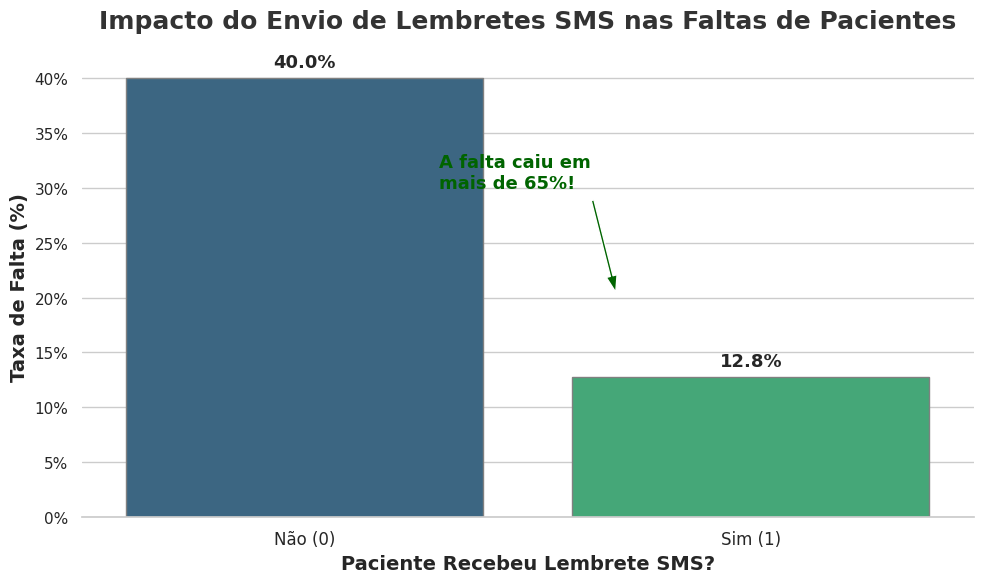

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definindo um estilo visual clean (fundo branco)
sns.set_theme(style="whitegrid")

# Criando a figura e o eixo
fig, ax = plt.subplots(figsize=(10, 6))

# Criando o gráfico de barras com paleta de cores 'viridis' (tons de verde/azul)
# A função barplot do seaborn é excelente para visualização de dados
barplot = sns.barplot(
    x='Recebeu_SMS',
    y='Faltou',
    data=df,
    estimator=lambda x: sum(x) / len(x) * 100, # Convertendo para porcentagem no eixo Y
    palette='viridis',
    errorbar=None, # Remove as linhas de erro para um visual mais limpo
    edgecolor='gray' # Adiciona uma borda sutil nas barras
)

# --- Personalização Avançada ---

# 1. Título e Rótulos (bem descritivos)
plt.title('Impacto do Envio de Lembretes SMS nas Faltas de Pacientes', fontsize=18, fontweight='bold', pad=20, color='#333333')
plt.xlabel('Paciente Recebeu Lembrete SMS?', fontsize=14, fontweight='bold')
plt.ylabel('Taxa de Falta (%)', fontsize=14, fontweight='bold')

# 2. Ajustando as etiquetas do eixo X (de 0/1 para Não/Sim)
ax.set_xticklabels(['Não (0)', 'Sim (1)'], fontsize=12)
ax.set_yticklabels([f'{int(x)}%' for x in ax.get_yticks()], fontsize=11) # Adiciona % no eixo Y

# 3. Adicionando os valores numéricos Exatos em cima de cada barra
for i in barplot.containers:
    barplot.bar_label(i, fmt='%.1f%%', fontsize=13, fontweight='bold', label_type='edge', padding=5)

# 4. Remove a borda superior e direita para um visual moderno
sns.despine(left=True, bottom=False)

# 5. Adicionando uma anotação de 'Insight' no próprio gráfico
plt.annotate(
    'A falta caiu em\nmais de 65%!',
    xy=(0.7, 20),
    xytext=(0.3, 30),
    fontsize=13,
    fontweight='bold',
    color='#006400',
    arrowprops=dict(facecolor='#006400', shrink=0.05, width=2, headwidth=8)
)

# Ajuste fino para não cortar nenhum elemento na exportação
plt.tight_layout()

# Mostra o gráfico final
plt.show()